# import

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import seaborn as sns

# DB server connect

In [98]:
remote.close()

In [4]:
dong_sql = """
SELECT * FROM DONG_PRICE_NEW ORDER BY gu, dong, YEAR
"""

In [5]:
cursor.execute(dong_sql)
result = cursor.fetchall()

dong_price = pd.DataFrame(result)
dong_price.columns = [desc[0] for desc in cursor.description]
dong_price.head()

,id,YEAR,GU,DONG,GROWTH,PRICE_YEAR
0,321,2014,강남구,개포동,0.0000,674997757
1,309,2015,강남구,개포동,11.0521,749599257
2,297,2016,강남구,개포동,20.0852,900157566
3,285,2017,강남구,개포동,21.3077,1091960421
4,273,2018,강남구,개포동,29.2468,1411323518


In [19]:
medic_sql = """SELECT a.YEAR, a.GUNGU, a.DONG, @prev as prev_avg,
         a.avg_minute - @prev as GROWTH,
        @prev := a.avg_minute as avg_minute
FROM (SELECT year, gungu, dong, avg_minute
        FROM TRANSPORTATION_ACCESSIBILITY 
        WHERE sido = "서울특별시" and CATEGORY like "%의료%" and mode = "대중교통"
        ORDER BY gungu, DONG, year ASC) a
HAVING a.year != 2016
ORDER BY growth ASC
LIMIT 10"""

transport_sql = """SELECT a.YEAR, a.GUNGU, a.DONG, @prev as prev_avg,
         a.avg_minute - @prev as GROWTH,
        @prev := a.avg_minute as avg_minute
FROM (SELECT year, gungu, dong, avg_minute
        FROM TRANSPORTATION_ACCESSIBILITY 
        WHERE sido = "서울특별시" and CATEGORY like "%교통%" and mode = "대중교통"
        ORDER BY gungu, DONG, year ASC) a
HAVING a.year != 2016
ORDER BY growth ASC
LIMIT 10"""

edu_sql = """SELECT a.YEAR, a.GUNGU, a.DONG, @prev as prev_avg,
         a.avg_minute - @prev as GROWTH,
        @prev := a.avg_minute as avg_minute
FROM (SELECT year, gungu, dong, avg_minute
        FROM TRANSPORTATION_ACCESSIBILITY 
        WHERE sido = "서울특별시" and CATEGORY like "%교육%" and mode = "대중교통"
        ORDER BY gungu, DONG, year ASC) a
HAVING a.year != 2016
ORDER BY growth ASC
LIMIT 10"""

In [20]:
cursor.execute(medic_sql)
result = cursor.fetchall()

medic = pd.DataFrame(result)
medic.columns = [desc[0] for desc in cursor.description]
medic

,YEAR,GUNGU,DONG,prev_avg,GROWTH,avg_minute
0,2017,송파구,가락1동,17.748519,-7.144932,10.603587
1,2017,강동구,성내1동,13.759249,-6.258908,7.500340
2,2017,양천구,신정1동,14.306436,-5.315384,8.991052
3,2017,영등포구,양평1동,13.671295,-5.201447,8.469848
4,2020,강동구,강일동,17.135672,-5.199759,11.935913
5,2017,영등포구,당산1동,11.260445,-4.774652,6.485793
6,2017,양천구,신정6동,13.297808,-4.632263,8.665545
7,2017,송파구,풍납1동,16.013991,-4.488260,11.525730
8,2017,양천구,신정2동,14.823031,-4.467912,10.355119
9,2017,강동구,성내2동,12.035634,-4.315514,7.720119


In [21]:
cursor.execute(transport_sql)
result = cursor.fetchall()

transport = pd.DataFrame(result)
transport.columns = [desc[0] for desc in cursor.description]
transport

,YEAR,GUNGU,DONG,prev_avg,GROWTH,avg_minute
0,2017,강서구,-,53.112560,-20.683128,32.429432
1,2017,송파구,가락1동,44.725239,-10.730605,33.994634
2,2019,성북구,정릉4동,57.818855,-8.767068,49.051787
3,2017,동대문구,-,46.723430,-8.621055,38.102375
4,2019,성북구,정릉3동,57.221517,-8.522171,48.699346
5,2019,송파구,마천2동,57.491447,-8.231927,49.259520
6,2019,노원구,중계본동,60.044104,-8.046668,51.997436
7,2019,종로구,부암동,49.624165,-7.837443,41.786721
8,2017,서초구,-,40.556516,-7.641336,32.915180
9,2019,강동구,고덕2동,62.648791,-7.546370,55.102421


In [22]:
cursor.execute(edu_sql)
result = cursor.fetchall()

edu = pd.DataFrame(result)
edu.columns = [desc[0] for desc in cursor.description]
edu

,YEAR,GUNGU,DONG,prev_avg,GROWTH,avg_minute
0,2017,-,-,32.740855,-25.538868,7.201986
1,2017,중랑구,-,11.227564,-3.916051,7.311513
2,2017,서초구,내곡동,15.801918,-3.302155,12.499764
3,2020,강동구,둔촌1동,9.390731,-3.228078,6.162653
4,2017,금천구,-,10.594777,-2.841016,7.753762
5,2020,중구,회현동,13.293869,-2.665654,10.628215
6,2020,중구,명동,11.888793,-2.654843,9.233950
7,2017,관악구,-,9.721098,-2.591210,7.129888
8,2019,송파구,마천1동,14.066330,-2.489435,11.576895
9,2017,마포구,-,9.886169,-2.452725,7.433444


In [23]:
medic["TYPE"] = "의료"
transport["TYPE"] = "교통"
edu["TYPE"] = "교육"

In [30]:
medic = medic[medic["DONG"] != "-"]
transport = transport[transport["DONG"] != "-"]
edu = edu[edu["DONG"] != "-"]

In [33]:
medic.drop(columns=["prev_avg", "avg_minute"], inplace=True)
transport.drop(columns=["prev_avg", "avg_minute"], inplace=True)
edu.drop(columns=["prev_avg", "avg_minute"], inplace=True)

/tmp/ipykernel_197190/2460749832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport.drop(columns=["prev_avg", "avg_minute"], inplace=True)
/tmp/ipykernel_197190/2460749832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu.drop(columns=["prev_avg", "avg_minute"], inplace=True)


In [35]:
medic.reset_index(inplace=True)
transport.reset_index(inplace=True)
edu.reset_index(inplace=True)

In [38]:
access = pd.concat([medic[:5], transport[:5], edu[:5]], axis=1)
access.drop(columns="index", inplace=True)

In [32]:
access.drop(columns=["prev_avg", "avg_minute"], inplace=True)
access

,YEAR,GUNGU,DONG,GROWTH,TYPE
0,2017,송파구,가락1동,-7.144932,의료
1,2017,강동구,성내1동,-6.258908,의료
2,2017,양천구,신정1동,-5.315384,의료
3,2017,영등포구,양평1동,-5.201447,의료
4,2020,강동구,강일동,-5.199759,의료
1,2017,송파구,가락1동,-10.730605,교통
2,2019,성북구,정릉4동,-8.767068,교통
4,2019,성북구,정릉3동,-8.522171,교통
5,2019,송파구,마천2동,-8.231927,교통
6,2019,노원구,중계본동,-8.046668,교통


In [22]:
capital_sql = """SELECT * from APARTMENT_AVG_PRICE_CATEGORY_MONTHLY WHERE CATEGORY = '수도권'"""

In [23]:
cursor.execute(capital_sql)
result = cursor.fetchall()

capital_area = pd.DataFrame(result)
capital_area.columns = [desc[0] for desc in cursor.description]
capital_area

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000
...,...,...,...,...
123,2024,4,수도권,664664000
124,2024,5,수도권,665731000
125,2024,6,수도권,669144000
126,2024,7,수도권,676207000


In [24]:
capital_year = capital_area[capital_area["MONTH"] == 1]

In [57]:
dong_price[dong_price["DONG"] == "양평동"]["PRICE_YEAR"]

Series([], Name: PRICE_YEAR, dtype: int64)

In [49]:
# dong_name = "가락동"

# dong_price[dong_price["DONG"] == "%s"]["PRICE_YEAR"] % dong_name

In [39]:
access

,YEAR,GUNGU,DONG,GROWTH,TYPE,YEAR,GUNGU,DONG,GROWTH,TYPE,YEAR,GUNGU,DONG,GROWTH,TYPE
0,2017,송파구,가락1동,-7.144932,의료,2017,송파구,가락1동,-10.730605,교통,2017,서초구,내곡동,-3.302155,교육
1,2017,강동구,성내1동,-6.258908,의료,2019,성북구,정릉4동,-8.767068,교통,2020,강동구,둔촌1동,-3.228078,교육
2,2017,양천구,신정1동,-5.315384,의료,2019,성북구,정릉3동,-8.522171,교통,2020,중구,회현동,-2.665654,교육
3,2017,영등포구,양평1동,-5.201447,의료,2019,송파구,마천2동,-8.231927,교통,2020,중구,명동,-2.654843,교육
4,2020,강동구,강일동,-5.199759,의료,2019,노원구,중계본동,-8.046668,교통,2019,송파구,마천1동,-2.489435,교육


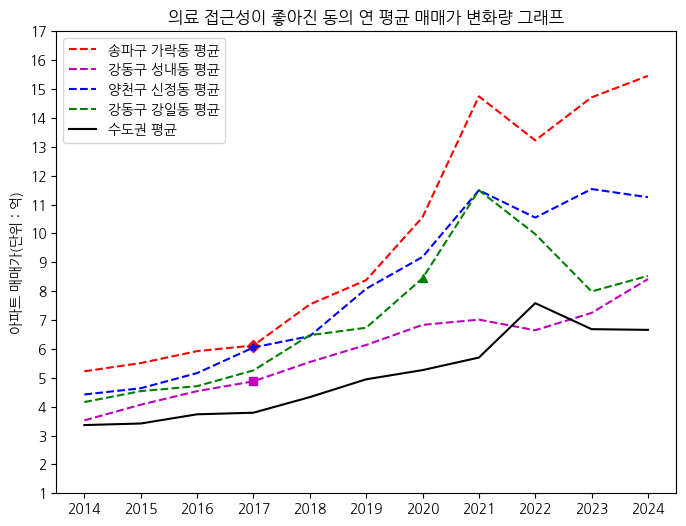

In [92]:
x_date = capital_year["YEAR"]

plt.figure(figsize=(8,6))

plt.plot(x_date, dong_price[dong_price["DONG"] == "가락동"]["PRICE_YEAR"], "r--", label = "송파구 가락동 평균")
plt.plot(2017, dong_price[(dong_price["DONG"] == "가락동") & (dong_price["YEAR"] == 2017)]["PRICE_YEAR"], 
         "rD") #, label= "의료 접근성 향상 시점"

plt.plot(x_date, dong_price[dong_price["DONG"] == "성내동"]["PRICE_YEAR"], "m--", label = "강동구 성내동 평균")
plt.plot(2017, dong_price[(dong_price["DONG"] == "성내동") & (dong_price["YEAR"] == 2017)]["PRICE_YEAR"], 
         "ms")

plt.plot(x_date, dong_price[dong_price["DONG"] == "신정동"]["PRICE_YEAR"], "b--", label = "양천구 신정동 평균")
plt.plot(2017, dong_price[(dong_price["DONG"] == "신정동") & (dong_price["YEAR"] == 2017)]["PRICE_YEAR"], 
         "b*")

plt.plot(x_date, dong_price[dong_price["DONG"] == "강일동"]["PRICE_YEAR"], "g--", label = "강동구 강일동 평균")
plt.plot(2020, dong_price[(dong_price["DONG"] == "강일동") & (dong_price["YEAR"] == 2020)]["PRICE_YEAR"], 
         "g^")

plt.plot(x_date,capital_year["PRICE"], "k-", label = "수도권 평균")
plt.title("의료 접근성이 좋아진 동의 연 평균 매매가 변화량 그래프")

plt.xticks(range(2014, 2025))
plt.yticks(range(100000000, 1800000000, 100000000), labels=range(1, 18))
plt.ylabel("아파트 매매가(단위 : 억)")
plt.legend()

plt.show()

In [74]:
remote.close()

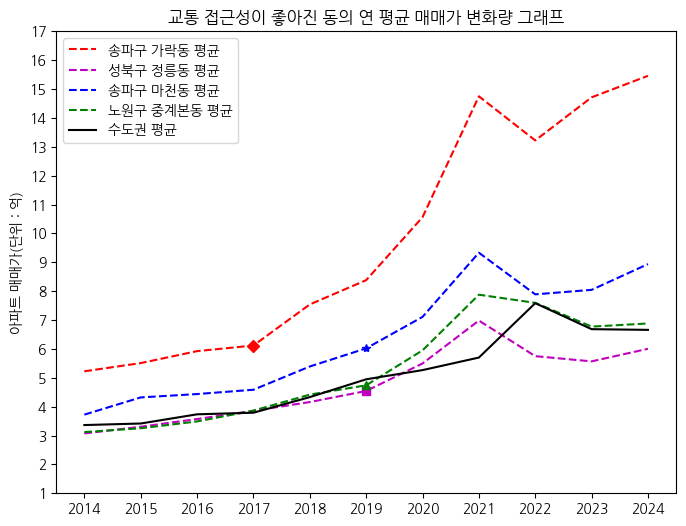

In [96]:
x_date = capital_year["YEAR"]

plt.figure(figsize=(8,6))

plt.plot(x_date, dong_price[dong_price["DONG"] == "가락동"]["PRICE_YEAR"], "r--", label = "송파구 가락동 평균")
plt.plot(2017, dong_price[(dong_price["DONG"] == "가락동") & (dong_price["YEAR"] == 2017)]["PRICE_YEAR"], 
         "rD")

plt.plot(x_date, dong_price[dong_price["DONG"] == "정릉동"]["PRICE_YEAR"], "m--", label = "성북구 정릉동 평균")
plt.plot(2019, dong_price[(dong_price["DONG"] == "정릉동") & (dong_price["YEAR"] == 2019)]["PRICE_YEAR"], 
         "ms")

plt.plot(x_date, dong_price[dong_price["DONG"] == "마천동"]["PRICE_YEAR"], "b--", label = "송파구 마천동 평균")
plt.plot(2019, dong_price[(dong_price["DONG"] == "마천동") & (dong_price["YEAR"] == 2019)]["PRICE_YEAR"], 
         "b*")

plt.plot(x_date, dong_price[dong_price["DONG"] == "중계본동"]["PRICE_YEAR"], "g--", label = "노원구 중계본동 평균")
plt.plot(2019, dong_price[(dong_price["DONG"] == "중계본동") & (dong_price["YEAR"] == 2019)]["PRICE_YEAR"], 
         "g^")

plt.plot(x_date,capital_year["PRICE"], "k-", label = "수도권 평균")
plt.title("교통 접근성이 좋아진 동의 연 평균 매매가 변화량 그래프")

plt.xticks(range(2014, 2025))
plt.yticks(range(100000000, 1800000000, 100000000), labels=range(1, 18))
plt.ylabel("아파트 매매가(단위 : 억)")
plt.legend()

plt.show()

In [83]:
access

,YEAR,GUNGU,DONG,GROWTH,TYPE,YEAR,GUNGU,DONG,GROWTH,TYPE,YEAR,GUNGU,DONG,GROWTH,TYPE
0,2017,송파구,가락1동,-7.144932,의료,2017,송파구,가락1동,-10.730605,교통,2017,서초구,내곡동,-3.302155,교육
1,2017,강동구,성내1동,-6.258908,의료,2019,성북구,정릉4동,-8.767068,교통,2020,강동구,둔촌1동,-3.228078,교육
2,2017,양천구,신정1동,-5.315384,의료,2019,성북구,정릉3동,-8.522171,교통,2020,중구,회현동,-2.665654,교육
3,2017,영등포구,양평1동,-5.201447,의료,2019,송파구,마천2동,-8.231927,교통,2020,중구,명동,-2.654843,교육
4,2020,강동구,강일동,-5.199759,의료,2019,노원구,중계본동,-8.046668,교통,2019,송파구,마천1동,-2.489435,교육


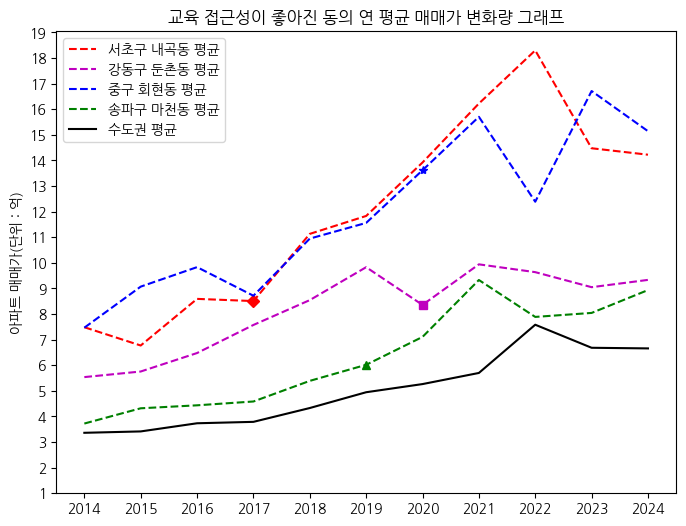

In [95]:
x_date = capital_year["YEAR"]

plt.figure(figsize=(8,6))

plt.plot(x_date, dong_price[dong_price["DONG"] == "내곡동"]["PRICE_YEAR"], "r--", label = "서초구 내곡동 평균")
plt.plot(2017, dong_price[(dong_price["DONG"] == "내곡동") & (dong_price["YEAR"] == 2017)]["PRICE_YEAR"], 
         "rD") #, label= "의료 접근성 향상 시점"

plt.plot(x_date, dong_price[dong_price["DONG"] == "둔촌동"]["PRICE_YEAR"], "m--", label = "강동구 둔촌동 평균")
plt.plot(2020, dong_price[(dong_price["DONG"] == "둔촌동") & (dong_price["YEAR"] == 2020)]["PRICE_YEAR"], 
         "ms")

plt.plot(x_date, dong_price[dong_price["DONG"] == "회현동"]["PRICE_YEAR"], "b--", label = "중구 회현동 평균")
plt.plot(2020, dong_price[(dong_price["DONG"] == "회현동") & (dong_price["YEAR"] == 2020)]["PRICE_YEAR"], 
         "b*")

plt.plot(x_date, dong_price[dong_price["DONG"] == "마천동"]["PRICE_YEAR"], "g--", label = "송파구 마천동 평균")
plt.plot(2019, dong_price[(dong_price["DONG"] == "마천동") & (dong_price["YEAR"] == 2019)]["PRICE_YEAR"], 
         "g^")

plt.plot(x_date,capital_year["PRICE"], "k-", label = "수도권 평균")

plt.title("교육 접근성이 좋아진 동의 연 평균 매매가 변화량 그래프")

plt.xticks(range(2014, 2025))
plt.yticks(range(100000000, 2000000000, 100000000), labels=range(1, 20))
plt.ylabel("아파트 매매가(단위 : 억)")
plt.legend()

plt.show()

In [5]:
metro = pd.read_csv("../data/metro_2010_WITH_DONG.csv")
metro

,Unnamed: 0,LINE_NAME,STATION_NAME,ADDRESS,EST_DATE,SIDO,GU,DONG,NEW_DONG
0,0,인천1호선,송도달빛축제공원,인천광역시 연수구 송도동 340번지,2020-12-12,인천광역시,연수구,송도2동,송도동
1,1,7호선,굴포천,경기도 부천시 길주로 623,2012-10-27,경기도,부천시,NaN,삼산동
2,2,7호선,까치울,경기도 부천시 길주로 626,2012-10-27,경기도,부천시,춘의동,춘의동
3,3,7호선,부천시청,경기도 부천시 길주로 202,2012-10-27,경기도,부천시,중1동,중동
4,4,7호선,부천종합운동장,경기도 부천시 길주로 502,2012-10-27,경기도,부천시,춘의동,춘의동
...,...,...,...,...,...,...,...,...,...
294,294,수인분당,초지,경기도 안산시 단원구 중앙대로 620,2020-08-06,경기도,안산시,초지동,초지동
295,295,수인분당,한대앞,경기도 안산시 상록구 충장로 337,2020-08-06,경기도,안산시,이동,이동
296,296,수인분당,한대앞,경기도 안산시 상록구 충장로 337,2020-08-06,경기도,안산시,이동,이동
297,297,수인분당,호구포,인천광역시 남동구 호구포로 205,2012-06-30,인천광역시,남동구,논현2동,논현동


In [6]:
metro.drop(columns=["Unnamed: 0", "DONG", "ADDRESS"], inplace=True)
metro

,LINE_NAME,STATION_NAME,EST_DATE,SIDO,GU,NEW_DONG
0,인천1호선,송도달빛축제공원,2020-12-12,인천광역시,연수구,송도동
1,7호선,굴포천,2012-10-27,경기도,부천시,삼산동
2,7호선,까치울,2012-10-27,경기도,부천시,춘의동
3,7호선,부천시청,2012-10-27,경기도,부천시,중동
4,7호선,부천종합운동장,2012-10-27,경기도,부천시,춘의동
...,...,...,...,...,...,...
294,수인분당,초지,2020-08-06,경기도,안산시,초지동
295,수인분당,한대앞,2020-08-06,경기도,안산시,이동
296,수인분당,한대앞,2020-08-06,경기도,안산시,이동
297,수인분당,호구포,2012-06-30,인천광역시,남동구,논현동


In [7]:
seoul_metro = metro[metro["SIDO"] == "서울특별시"]

In [8]:
seoul_metro.sort_values(by="EST_DATE", inplace=True)

/tmp/ipykernel_207302/4028985794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_metro.sort_values(by="EST_DATE", inplace=True)


In [9]:
seoul_metro.reset_index(inplace=True)

In [10]:
seoul_metro.drop(columns="index", inplace=True)

/tmp/ipykernel_207302/279605050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_metro.drop(columns="index", inplace=True)


In [11]:
seoul_metro

,LINE_NAME,STATION_NAME,EST_DATE,SIDO,GU,NEW_DONG
0,3호선,가락시장,2010-02-18,서울특별시,송파구,가락동
1,3호선,경찰병원,2010-02-18,서울특별시,송파구,가락동
2,3호선,오금,2010-02-18,서울특별시,송파구,오금동
3,공항철도,디지털미디어시티,2010-12-29,서울특별시,마포구,증산동
4,공항철도,서울역,2010-12-29,서울특별시,용산구,동자동
5,공항철도,홍대입구,2010-12-29,서울특별시,마포구,동교동
6,공항철도,공덕,2011-11-30,서울특별시,마포구,공덕동
7,수인분당,왕십리,2012-10-06,서울특별시,성동구,행당동
8,수인분당,강남구청,2012-10-06,서울특별시,강남구,삼성동
9,수인분당,강남구청,2012-10-06,서울특별시,강남구,삼성동


In [12]:
new_metro_dong_list = seoul_metro[24:]["NEW_DONG"].unique()

In [112]:
dong_price

,YEAR,GU,DONG,GROWTH,PRICE_YEAR
0,2014,강남구,개포동,0.0000,674997757
1,2015,강남구,개포동,11.0521,749599257
2,2016,강남구,개포동,20.0852,900157566
3,2017,강남구,개포동,21.3077,1091960421
4,2018,강남구,개포동,29.2468,1411323518
...,...,...,...,...,...
562,2020,중랑구,전체,15.8659,510627326
563,2021,중랑구,전체,27.3070,650064244
564,2022,중랑구,전체,-23.8079,495297750
565,2023,중랑구,전체,16.2506,575786751


In [130]:
price_dong_list = dong_price["DONG"].unique()

In [132]:
new_metro_dong_list

array(['효창동', '휘경동', '전농동', '중화동', '마곡동', '방이동', '둔촌동', '삼전동', '잠실동',
       '석촌동', '신길동'], dtype=object)

In [133]:
price_dong_list

array(['개포동', '자곡동', '강일동', '고덕동', '둔촌동', '상일동', '성내동', '미아동', '가양동',
       '마곡동', '궁동', '천왕동', '항동', '독산동', '중계본동', '도봉동', '아현동', '남가좌동',
       '내곡동', '서초동', '신원동', '금호동1가', '금호동2가', '금호동3가', '금호동4가', '하왕십리동',
       '성북동', '성북동1가', '정릉동', '가락동', '거여동', '마천동', '장지동', '신정동', '당산동',
       '당산동1가', '당산동2가', '당산동3가', '당산동4가', '당산동5가', '당산동6가', '신길동', '녹번동',
       '응암동', '전체', '진관동', '부암동', '숭인동', '회현동', '망우동', '신내동'],
      dtype=object)

In [131]:
dong_list = []

for dong in new_metro_dong_list:
    if dong in price_dong_list:
        dong_list.append(dong)

print(dong_list)

['마곡동', '둔촌동', '신길동']


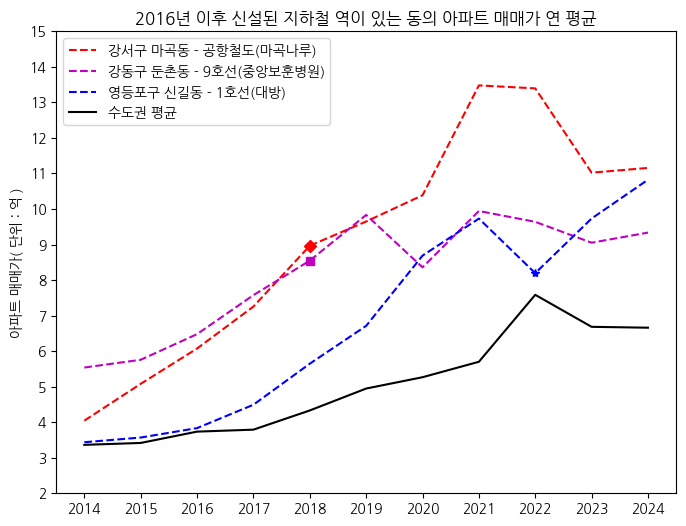

In [141]:
x_date = capital_year["YEAR"]

plt.figure(figsize=(8,6))

plt.plot(x_date, dong_price[dong_price["DONG"] == "마곡동"]["PRICE_YEAR"], "r--", label = "강서구 마곡동 - 공항철도(마곡나루)")
plt.plot(2018, dong_price[(dong_price["DONG"] == "마곡동") & (dong_price["YEAR"] == 2018)]["PRICE_YEAR"], 
         "rD") #2018.9

plt.plot(x_date, dong_price[dong_price["DONG"] == "둔촌동"]["PRICE_YEAR"], "m--", label = "강동구 둔촌동 - 9호선(중앙보훈병원)")
plt.plot(2018, dong_price[(dong_price["DONG"] == "둔촌동") & (dong_price["YEAR"] == 2018)]["PRICE_YEAR"], 
         "ms") #2018.12

plt.plot(x_date, dong_price[dong_price["DONG"] == "신길동"]["PRICE_YEAR"], "b--", label = "영등포구 신길동 - 1호선(대방)")
plt.plot(2022, dong_price[(dong_price["DONG"] == "신길동") & (dong_price["YEAR"] == 2022)]["PRICE_YEAR"], 
         "b*") #2022.6

plt.plot(x_date,capital_year["PRICE"], "k-", label = "수도권 평균")

plt.title("2016년 이후 신설된 지하철 역이 있는 동의 아파트 매매가 연 평균")

plt.xticks(range(2014, 2025))
plt.yticks(range(200000000, 1600000000, 100000000), labels=range(2, 16))
plt.ylabel("아파트 매매가( 단위 : 억 )")
plt.legend(loc=2)

plt.show()

In [13]:
dong_sql = """
SELECT * FROM SEOUL_DONG_PRICE_YEARLY ORDER BY gu, dong, YEAR
"""

cursor.execute(dong_sql)
result = cursor.fetchall()

dong_year = pd.DataFrame(result)
dong_year.columns = [desc[0] for desc in cursor.description]
dong_year.tail()

,YEAR,GU,DONG,AVG_PRICE
3441,2020,중랑구,중화동,500824468
3442,2021,중랑구,중화동,634930357
3443,2022,중랑구,중화동,427260869
3444,2023,중랑구,중화동,519795454
3445,2024,중랑구,중화동,562696629


In [16]:
remote.close()

In [15]:
new_metro_dong_list

array(['효창동', '휘경동', '전농동', '중화동', '마곡동', '방이동', '둔촌동', '삼전동', '잠실동',
       '석촌동', '신길동'], dtype=object)

In [14]:
dong_list = dong_year["DONG"].unique()

In [149]:
def label_maker(dong):
    for i, row in seoul_metro.iterrows():
        if row["NEW_DONG"] == dong:
            gu = row["GU"]
            line = row["LINE_NAME"]
            station = row["STATION_NAME"]
            year = row["EST_DATE"]
            label = str(gu) + " " + str(dong) + " - " + \
                    str(line) + " " + str(station) + "역 " + str(year) + " 개통"
    return label, year

In [147]:
def draw_plot(dong, color, marker, lw = 1.5):
    label, year = label_maker(dong)
    year = int(year[:4])
    plt.plot(dong_year[dong_year["DONG"] == dong]["YEAR"], dong_year[dong_year["DONG"] == dong]["AVG_PRICE"], 
             color, label = label, lw = lw)
    plt.plot(int(year), dong_year[(dong_year["DONG"] == dong) & (dong_year["YEAR"] == year)]["AVG_PRICE"], 
         marker)

# 그래프 그리귀~

In [183]:
def draw_plot(dong, color, marker, lw = 1.5):
    plt.plot(dong_year[dong_year["DONG"] == dong]["YEAR"], dong_year[dong_year["DONG"] == dong]["AVG_PRICE"], 
             color, lw = lw, label = dong)

In [171]:
dong_year

,YEAR,GU,DONG,AVG_PRICE,METRO
0,2014,강남구,개포동,675095010,old
1,2015,강남구,개포동,740169933,old
2,2016,강남구,개포동,881572605,old
3,2017,강남구,개포동,1080648173,old
4,2018,강남구,개포동,1422776349,old
...,...,...,...,...,...
3441,2020,중랑구,중화동,500824468,metro
3442,2021,중랑구,중화동,634930357,metro
3443,2022,중랑구,중화동,427260869,metro
3444,2023,중랑구,중화동,519795454,metro


In [172]:
df = pd.pivot_table(data= dong_year, index="YEAR", values="AVG_PRICE", aggfunc="mean")

In [175]:
df.reset_index(inplace=True)

In [176]:
df

,YEAR,AVG_PRICE
0,2014,4.531233e+08
1,2015,4.795419e+08
2,2016,5.362859e+08
3,2017,5.940824e+08
4,2018,6.798577e+08
5,2019,7.592240e+08
6,2020,8.799667e+08
7,2021,1.043770e+09
8,2022,1.003078e+09
9,2023,9.978787e+08


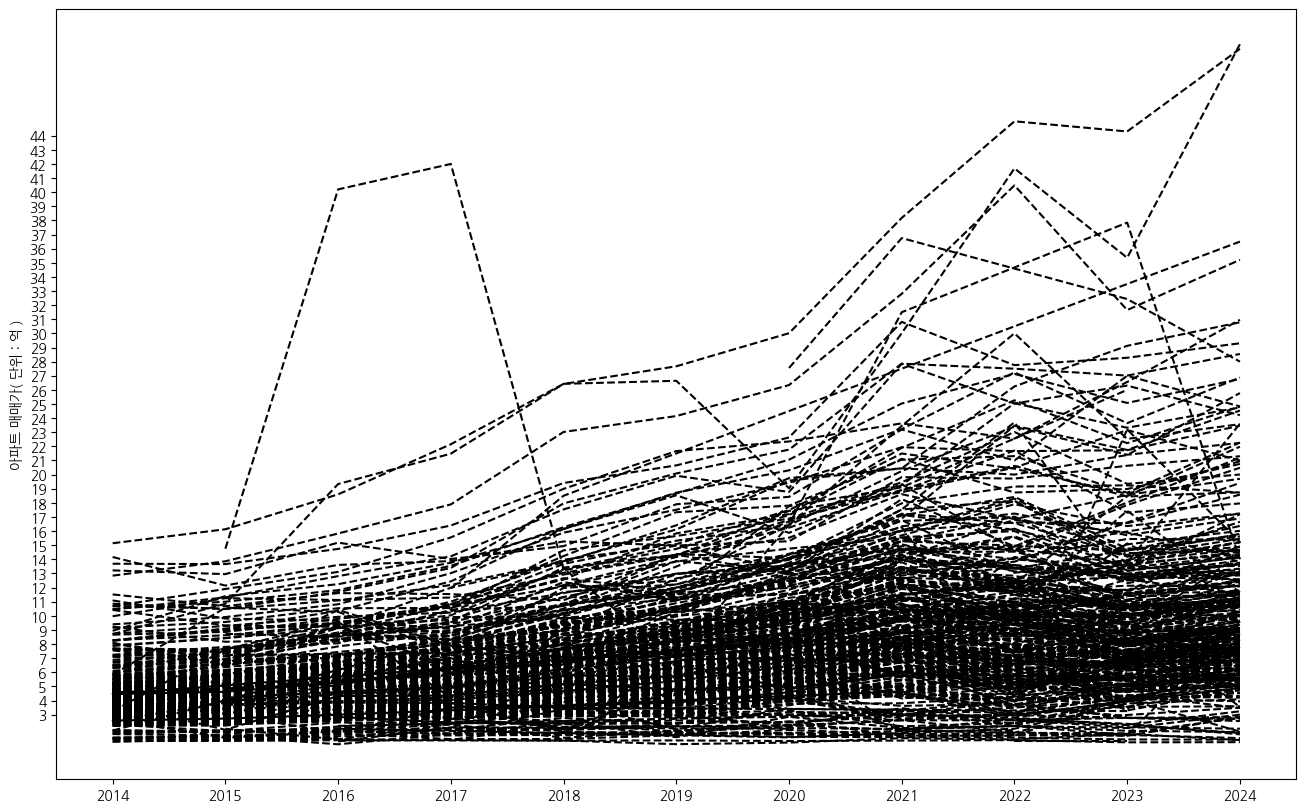

In [200]:
plt.figure(figsize=(16,10))

for dong in dong_list:
    draw_plot(dong, "k--", "k*")

plt.plot(df["YEAR"],df["AVG_PRICE"], "k--", label = "서울 평균", lw=2.5)

eook = 3
eoook = 45
plt.xticks(range(2014, 2025))
plt.yticks(range(100000000 * eook, 100000000 * eoook, 100000000), labels=range(eook, eoook))
plt.ylabel("아파트 매매가( 단위 : 억 )")

plt.show()

In [203]:
sql = """
SELECT b.year, b.gu, b.dong, b.growth, b.prev_avg, b.avg_price
FROM (SELECT a.YEAR, a.gu, a.dong, @prev as prev_avg,
        round(100 * (a.avg_price - @prev) / @prev , 4) as GROWTH,
        @prev := a.avg_price as avg_price
FROM (SELECT year, gu, dong, AVG_price from SEOUL_DONG_PRICE_YEARLY
      group by gu, dong, year
      ORDER BY gu, dong, YEAR) a ) b
HAVING b.year != 2014
ORDER BY growth DESC
"""

cursor.execute(sql)
result = cursor.fetchall()

dong_growth = pd.DataFrame(result)
dong_growth.columns = [desc[0] for desc in cursor.description]
dong_growth[:10]

,year,gu,dong,growth,prev_avg,avg_price
0,2024,종로구,충신동,532.0988,151875000,960000000
1,2023,강남구,신사동,349.3146,516306880,2319842105
2,2017,중구,만리동2가,343.8334,187300000,831300000
3,2018,종로구,평동,299.1803,305000000,1217500000
4,2019,성북구,성북동1가,287.7292,177250000,687250000
5,2020,종로구,신문로2가,213.0682,880000000,2755000000
6,2018,성북구,보문동6가,201.1297,198215000,596884313
7,2023,영등포구,영등포동2가,181.1790,150058823,421933888
8,2018,용산구,원효로3가,173.3333,125000000,341666666
9,2016,중구,장충동1가,172.5424,1475000000,4020000000


In [207]:
def draw_plot(dong, gu, year, color, marker, lw = 1.5):
    plt.plot(dong_year[dong_year["DONG"] == dong]["YEAR"], 
             dong_year[(dong_year["DONG"] == dong) & (dong_year[dong_year["GU"] == gu])]["AVG_PRICE"], 
             color, lw = lw, label = dong)
    plt.plot(year, 
             dong_year[(dong_year["DONG"] == dong) & (dong_year["YEAR"] == year) & (dong_year[dong_year["GU"] == gu])]["AVG_PRICE"], 
             marker)

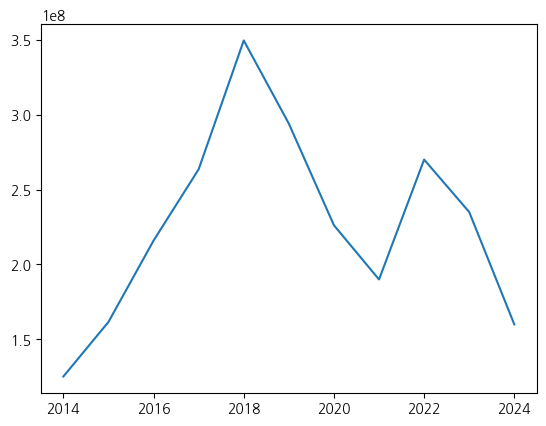

In [212]:
dong = "성북동"
gu = "성북구"

plt.plot(dong_year[dong_year["DONG"] == dong]["YEAR"], 
             dong_year[(dong_year["DONG"] == dong) & (dong_year["GU"] == gu)]["AVG_PRICE"])
plt.show()

In [208]:
plt.figure(figsize=(12,10))

for i, row in dong_growth[:10].iterrows():
    draw_plot(row["dong"], row["gu"], row["year"], "b-", "b*")

plt.plot(df["YEAR"],df["AVG_PRICE"], "k--", label = "서울 평균", lw=2.5)

eook = 3
eoook = 45
plt.xticks(range(2014, 2025))
plt.yticks(range(100000000 * eook, 100000000 * eoook, 100000000), labels=range(eook, eoook))
plt.ylabel("아파트 매매가( 단위 : 억 )")

plt.legend(loc=2)

plt.show()

TypeError: unsupported operand type(s) for &: 'bool' and 'str'

<Figure size 1200x1000 with 0 Axes>

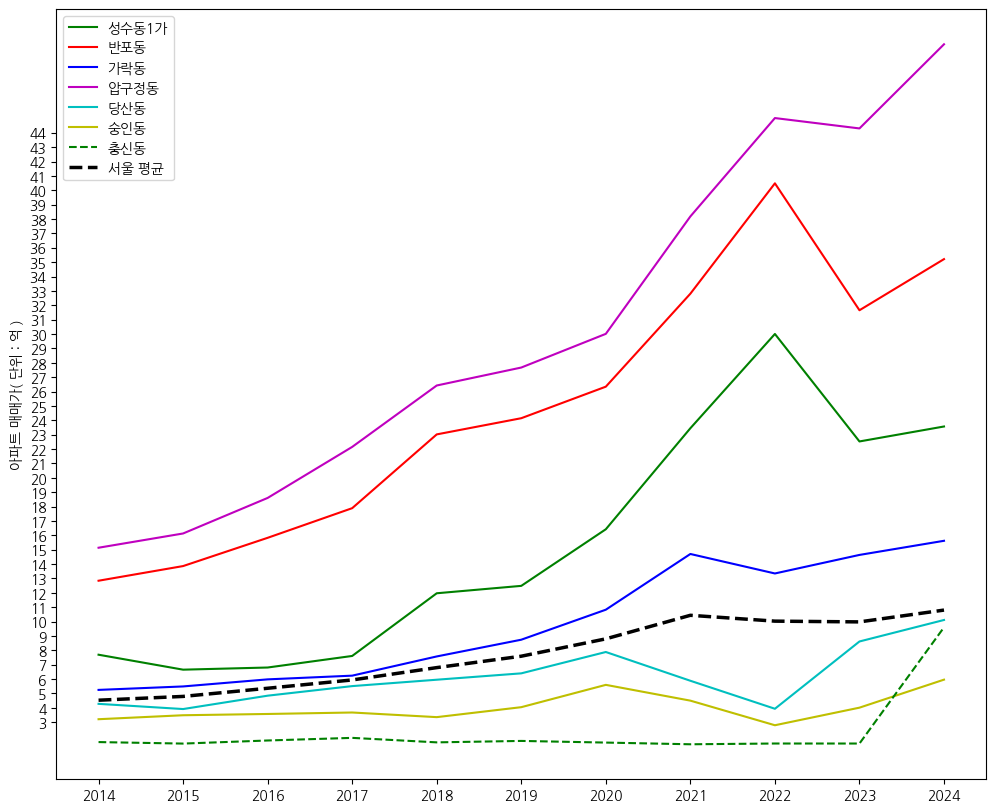

In [195]:
plt.figure(figsize=(12,10))

draw_plot("성수동1가", "g-", "k^")
draw_plot("반포동", "r-", "r*")
draw_plot("가락동", "b-", "r*")
draw_plot("압구정동", "m-", "ms")
draw_plot("당산동", "c-", "c*")
draw_plot("숭인동", "y-", "y*")
draw_plot("충신동", "g--", "g*")
#draw_plot("신사동", "r--", "rd")

plt.plot(df["YEAR"],df["AVG_PRICE"], "k--", label = "서울 평균", lw=2.5)

eook = 3
eoook = 45
plt.xticks(range(2014, 2025))
plt.yticks(range(100000000 * eook, 100000000 * eoook, 100000000), labels=range(eook, eoook))
plt.ylabel("아파트 매매가( 단위 : 억 )")

plt.legend(loc=2)

plt.show()

In [211]:
for dong in new_metro_dong_list:
    if dong in dong_list:
        print(dong, "있음")
    else:
        print("왜 없을까?", dong)

효창동 있음
휘경동 있음
전농동 있음
중화동 있음
마곡동 있음
방이동 있음
둔촌동 있음
삼전동 있음
잠실동 있음
석촌동 있음
신길동 있음


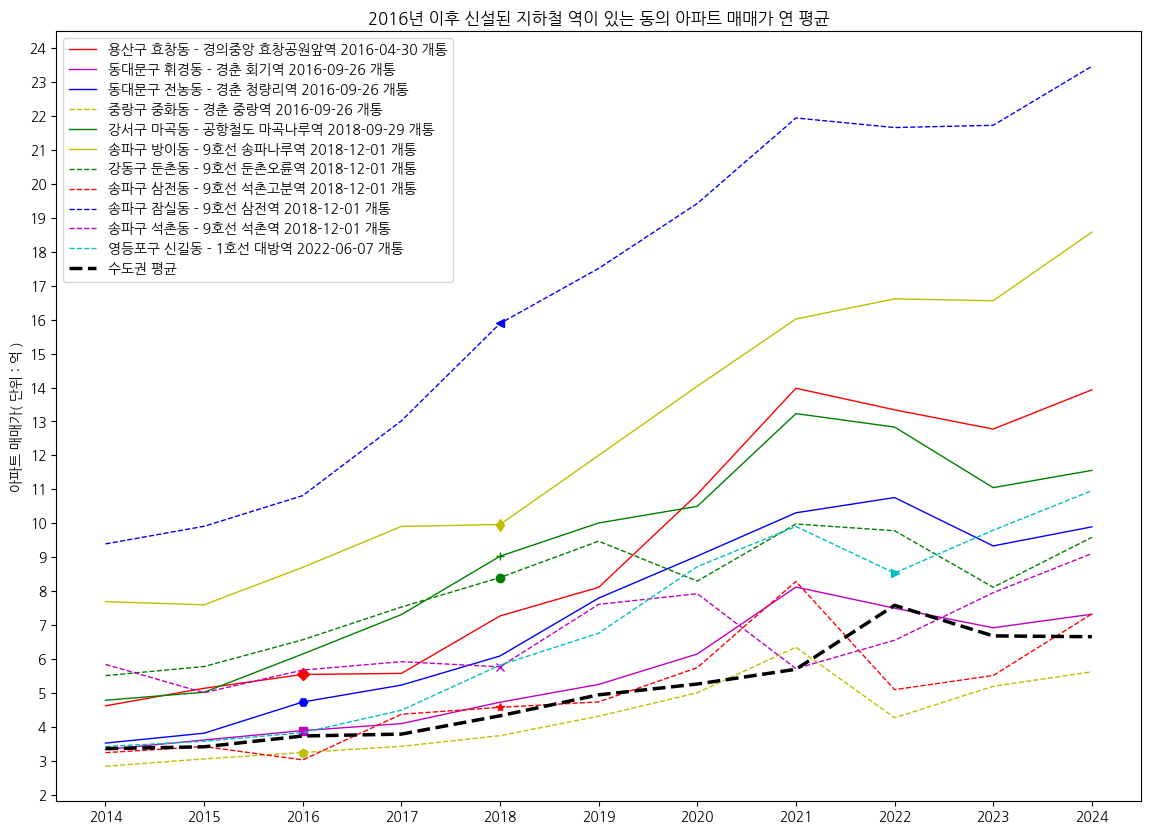

In [271]:
x_date = capital_year["YEAR"]

plt.figure(figsize=(14,10))

draw_plot("효창동", "r-", "rD", 1)
draw_plot("휘경동", "m-", "ms", 1)
draw_plot("전농동", "b-", "bH", 1)
draw_plot("중화동", "y--", "yh", 1)
draw_plot("마곡동", "g-", "g+", 1)
draw_plot("방이동", "y-", "yd", 1)
draw_plot("둔촌동", "g--", "go", 1)
draw_plot("삼전동", "r--", "r*", 1)
draw_plot("잠실동", "b--", "b<", 1)
draw_plot("석촌동", "m--", "mx", 1)
draw_plot("신길동", "c--", "c>", 1)

plt.plot(x_date,capital_year["PRICE"], "k--", label = "수도권 평균", lw=2.5)

plt.title("2016년 이후 신설된 지하철 역이 있는 동의 아파트 매매가 연 평균")

eoook = 25
plt.xticks(range(2014, 2025))
plt.yticks(range(200000000, 100000000 * eoook, 100000000), labels=range(2, eoook))
plt.ylabel("아파트 매매가( 단위 : 억 )")
plt.legend(loc=2)

plt.show()

# meetro

In [142]:
capital_area.head()

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000


In [151]:
capital_area.shape

(128, 4)

In [153]:
date_list = []
for i, row in capital_area.iterrows():
    date_list.append(str(row["YEAR"]) + "." + str(row["MONTH"]))

In [162]:
capital_area["DATE"] = date_list

In [196]:
dong_sql = """
SELECT * FROM DONG_PRICE ORDER BY gu, dong, YEAR, month
"""

cursor.execute(dong_sql)
result = cursor.fetchall()

dong_month = pd.DataFrame(result)
dong_month.columns = [desc[0] for desc in cursor.description]
dong_month.tail()

,ID,YEAR,MONTH,GU,DONG,PRICE,GROWTH,PRICE_YEAR
6018,3867,2024,4,중랑구,전체,575956617,2.9196,None
6019,3866,2024,5,중랑구,전체,638448275,10.8501,None
6020,3865,2024,6,중랑구,전체,636717391,-0.2711,None
6021,3864,2024,7,중랑구,전체,690845177,8.5011,None
6022,3863,2024,8,중랑구,전체,665056994,-3.7328,None


In [198]:
dong_month.drop(columns=["ID", "PRICE_YEAR"], inplace=True)

In [199]:
date_list = []
for i, row in dong_month.iterrows():
    date_list.append(str(row["YEAR"]) + "." + str(row["MONTH"]))

dong_month["DATE"] = date_list

In [176]:
x_date = []
y = 2017
m = 1

for i in range(8):
    for j in range(12):
        x_date.append(str(y) + "." + str(m))
        print(y, m, i, j)
        m += 1
        if m > 12:
            m = 1
        else: pass
    y += 1

print(x_date)

2017 1 0 0
2017 2 0 1
2017 3 0 2
2017 4 0 3
2017 5 0 4
2017 6 0 5
2017 7 0 6
2017 8 0 7
2017 9 0 8
2017 10 0 9
2017 11 0 10
2017 12 0 11
2018 1 1 0
2018 2 1 1
2018 3 1 2
2018 4 1 3
2018 5 1 4
2018 6 1 5
2018 7 1 6
2018 8 1 7
2018 9 1 8
2018 10 1 9
2018 11 1 10
2018 12 1 11
2019 1 2 0
2019 2 2 1
2019 3 2 2
2019 4 2 3
2019 5 2 4
2019 6 2 5
2019 7 2 6
2019 8 2 7
2019 9 2 8
2019 10 2 9
2019 11 2 10
2019 12 2 11
2020 1 3 0
2020 2 3 1
2020 3 3 2
2020 4 3 3
2020 5 3 4
2020 6 3 5
2020 7 3 6
2020 8 3 7
2020 9 3 8
2020 10 3 9
2020 11 3 10
2020 12 3 11
2021 1 4 0
2021 2 4 1
2021 3 4 2
2021 4 4 3
2021 5 4 4
2021 6 4 5
2021 7 4 6
2021 8 4 7
2021 9 4 8
2021 10 4 9
2021 11 4 10
2021 12 4 11
2022 1 5 0
2022 2 5 1
2022 3 5 2
2022 4 5 3
2022 5 5 4
2022 6 5 5
2022 7 5 6
2022 8 5 7
2022 9 5 8
2022 10 5 9
2022 11 5 10
2022 12 5 11
2023 1 6 0
2023 2 6 1
2023 3 6 2
2023 4 6 3
2023 5 6 4
2023 6 6 5
2023 7 6 6
2023 8 6 7
2023 9 6 8
2023 10 6 9
2023 11 6 10
2023 12 6 11
2024 1 7 0
2024 2 7 1
2024 3 7 2
2024 4 7

# try to show price_month

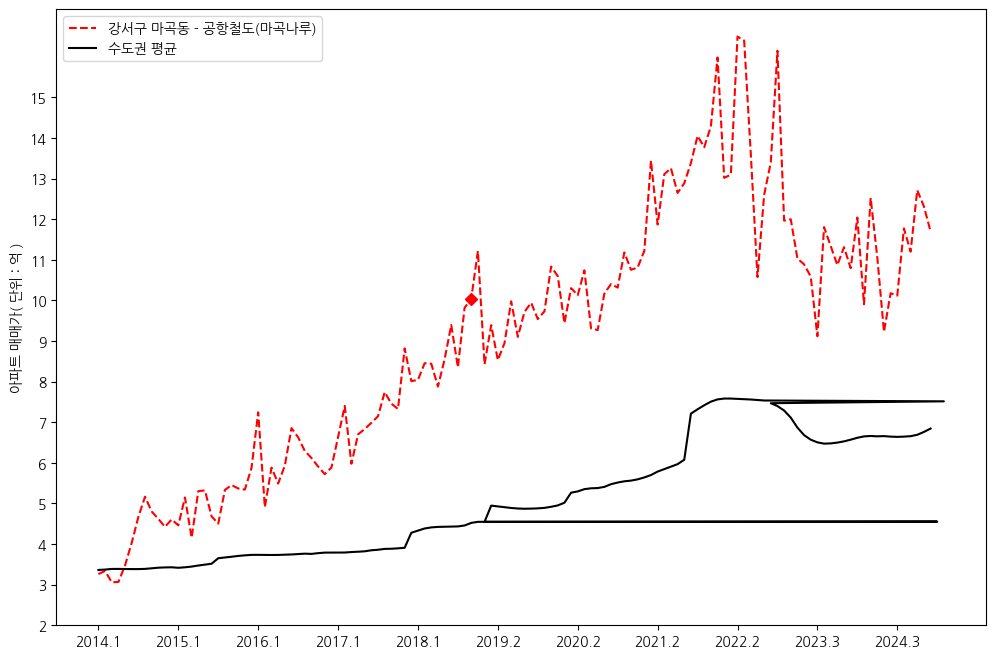

In [201]:
plt.figure(figsize=(12,8))

plt.plot(dong_month[dong_month["DONG"] == "마곡동"]["DATE"], dong_month[dong_month["DONG"] == "마곡동"]["PRICE"],
          "r--", label = "강서구 마곡동 - 공항철도(마곡나루)")
plt.plot("2018.9", dong_month[(dong_month["DONG"] == "마곡동") & (dong_month["YEAR"] == 2018) 
                              & (dong_month["MONTH"] == 9)]["PRICE"], "rD") #2018.9

plt.plot(capital_area["DATE"], capital_area["PRICE"], "k-", label = "수도권 평균")

plt.xticks(np.arange(128, step= 12))
plt.yticks(range(200000000, 1600000000, 100000000), labels=range(2, 16))
plt.ylabel("아파트 매매가( 단위 : 억 )")
plt.legend(loc=2)

plt.show()

/tmp/ipykernel_197190/4260832507.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(dong_month[dong_month["DONG"] == "둔촌동"]["DATE"], dong_month[dong_price["DONG"] == "둔촌동"]["PRICE"],


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

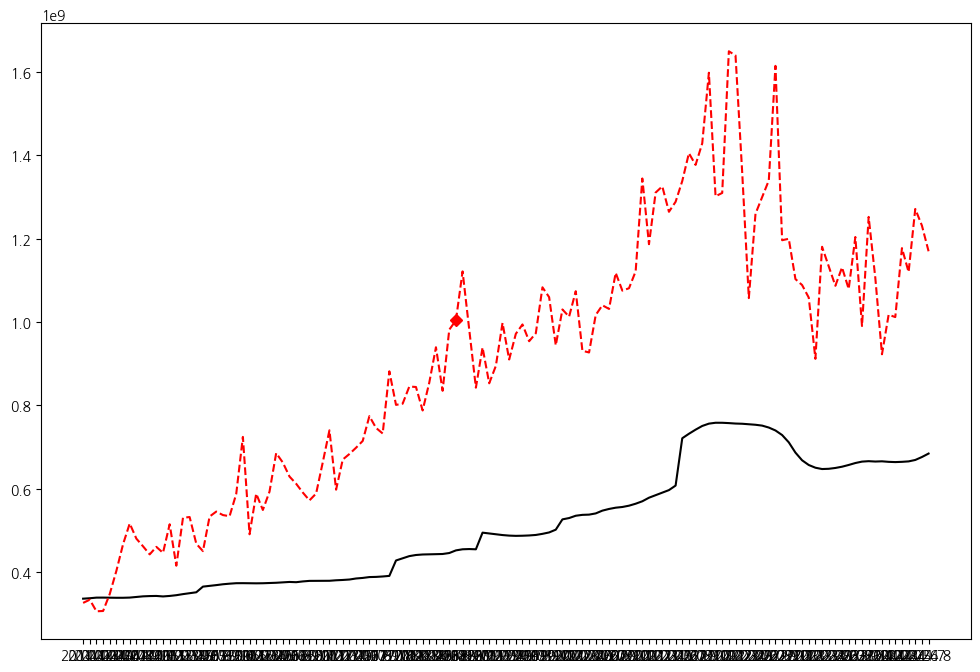

In [203]:
plt.figure(figsize=(12,8))

plt.plot(capital_area["DATE"], capital_area["PRICE"], "k-", label = "수도권 평균")

plt.plot(dong_month[dong_month["DONG"] == "마곡동"]["DATE"], dong_month[dong_month["DONG"] == "마곡동"]["PRICE"],
         "r--", label = "강서구 마곡동 - 공항철도(마곡나루)")
plt.plot("2018.9", dong_month[(dong_month["DONG"] == "마곡동") & (dong_month["YEAR"] == 2018) 
                              & (dong_month["MONTH"] == 9)]["PRICE"], "rD") #2018.9

plt.plot(dong_month[dong_month["DONG"] == "둔촌동"]["DATE"], dong_month[dong_price["DONG"] == "둔촌동"]["PRICE"], 
         "m--", label = "강동구 둔촌동 - 9호선(중앙보훈병원)")
plt.plot("2018.12", dong_month[(dong_month["DONG"] == "둔촌동") & (dong_month["YEAR"] == 2018) 
                              & (dong_month["MONTH"] == 12)]["PRICE"], "ms") #2018.12

plt.plot(dong_month[dong_month["DONG"] == "신길동"]["DATE"], dong_month[dong_price["DONG"] == "신길동"]["PRICE"], 
         "b--", label = "영등포구 신길동 - 1호선(대방)")
plt.plot("2022.6", dong_month[(dong_month["DONG"] == "신길동") & (dong_month["YEAR"] == 2022) 
                              & (dong_month["MONTH"] == 6)]["PRICE"], "b*") #2022.6

plt.title("2016년 이후 신설된 지하철 역이 있는 동의 아파트 매매가 연 평균")

plt.xticks(np.arange(128, 12))
plt.yticks(range(200000000, 1600000000, 100000000), labels=range(2, 16))
plt.ylabel("아파트 매매가( 단위 : 억 )")
plt.legend(loc=2)

plt.show()

# public sector

In [274]:
public = pd.read_csv("../data/public_sector.csv")
public.drop(columns="Unnamed: 0", inplace=True)
public.tail()

,NAME,MINISTRY,EST_DATE,ADDRESS,GU,DONG
17,차세대수치예보모델개발사업단,기상청,2020-09-01,서울특별시 동작구 보라매로5길 35 4층(신대방동 보라매파크스퀘어),동작구,신대방제2동
18,의료기관평가인증원,보건복지부,2020-09-05,서울특별시 영등포구 국회대로 76길 10(여의도동) 10층,영등포구,여의동
19,중소벤처기업연구원,중소벤처기업부,2021-06-09,서울특별시 동작구 신대방1가길 77 (신대방동 686-70),동작구,신대방제1동
20,재외동포협력센터,재외동포청,2023-06-05,서울특별시 서초구 남부순환로 2558 외교타운 4층,서초구,서초2동
21,한국환경보전원,환경부,2023-12-01,서울특별시 성동구 광나루로 320-2,성동구,성수2가제3동


In [326]:
public_dong_list = public["DONG"].unique()

회현동1가, 회현동2가

In [319]:
public["DONG"] = public["DONG"].str.replace("필동", "필동1가")

In [303]:
month_dong_list = dong_month["DONG"].unique()

In [327]:
for dong in public_dong_list:
    if dong in dong_list:
        print(dong, "있음 ", end="")
    else:
        print("     ")
        print("     왜 없을까?", dong)

필동1가 있음 상암동 있음 여의도동 있음      
     왜 없을까? 회현동
     
     왜 없을까? 충현동
     
     왜 없을까? 광희동
양재동 있음      
     왜 없을까? 종로동1가
당산동1가 있음 중림동 있음 공항동 있음 역삼동 있음 신대방동 있음 서초동 있음 성수동2가 있음 

In [307]:
for dong in public_dong_list:
    if dong in month_dong_list:
        print(dong, "있음 ")
    else: pass
        # print(" ")
        # print("왜 없을까?", dong)

회현동 있음 
당산동1가 있음 
서초동 있음 


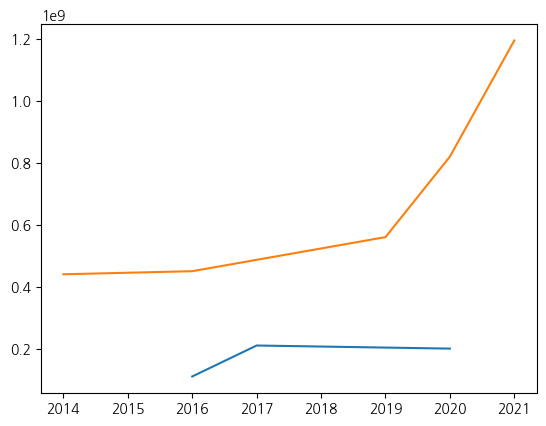

In [318]:
plt.plot(dong_year[dong_year["DONG"] == "필동1가"]["YEAR"], dong_year[dong_year["DONG"] == "필동1가"]["AVG_PRICE"])
plt.plot(dong_year[dong_year["DONG"] == "필동3가"]["YEAR"], dong_year[dong_year["DONG"] == "필동3가"]["AVG_PRICE"])
plt.show()

In [355]:
def label_maker_public(dong):
    for i, row in public.iterrows():
        if row["DONG"] == dong:
            gu = row["GU"]
            name = row["NAME"]
            year = row["EST_DATE"]
            label = str(gu) + " " + str(dong) + " - " + str(name) + " " + str(year) + " 설립"
    return label, year

In [356]:
def draw_plot_public(dong, color, marker, lw = 1.5):
    label, year = label_maker_public(dong)
    year = int(year[:4])
    plt.plot(dong_year[dong_year["DONG"] == dong]["YEAR"], dong_year[dong_year["DONG"] == dong]["AVG_PRICE"], 
             color, label = label, lw = lw)
    plt.plot(int(year), dong_year[(dong_year["DONG"] == dong) & (dong_year["YEAR"] == year)]["AVG_PRICE"], 
         marker)

In [323]:
color_list = ["r-", "m-", "b-", "c-", "g-", "y-", "g--", "m--", "b--", "r--", "c--", "y--"]
marker_list = ["rd", "md", "bd", "cd", "gd", "yd", "gd", "md", "bd", "rd", "cd", "yd"]

In [357]:
len(color_list), len(marker_list), len(public_dong_list)

(12, 12, 11)

In [332]:
print(public_dong_list)

['필동1가' '상암동' '여의도동' '회현동' '충현동' '광희동' '양재동' '종로동1가' '당산동1가' '중림동' '공항동'
 '역삼동' '신대방동' '서초동' '성수동2가']


In [340]:
public_dong_list = np.delete(public_dong_list, 3)
public_dong_list

array(['필동1가', '상암동', '여의도동', '양재동', '당산동1가', '중림동', '공항동', '역삼동', '신대방동',
       '서초동', '성수동2가'], dtype=object)

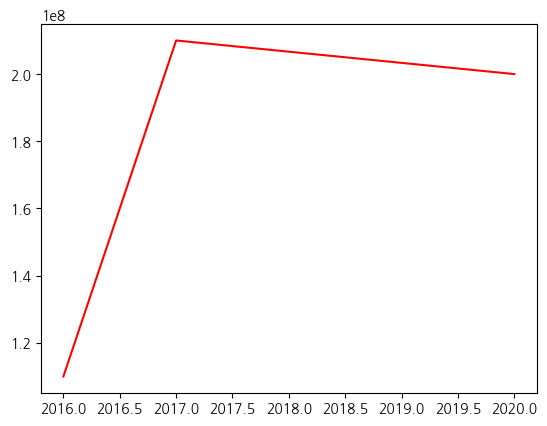

In [349]:
dong = "필동1가"
color = color_list[0]
marker = marker_list[0]

plt.plot(dong_year[dong_year["DONG"] == dong]["YEAR"], dong_year[dong_year["DONG"] == dong]["AVG_PRICE"], 
             color)

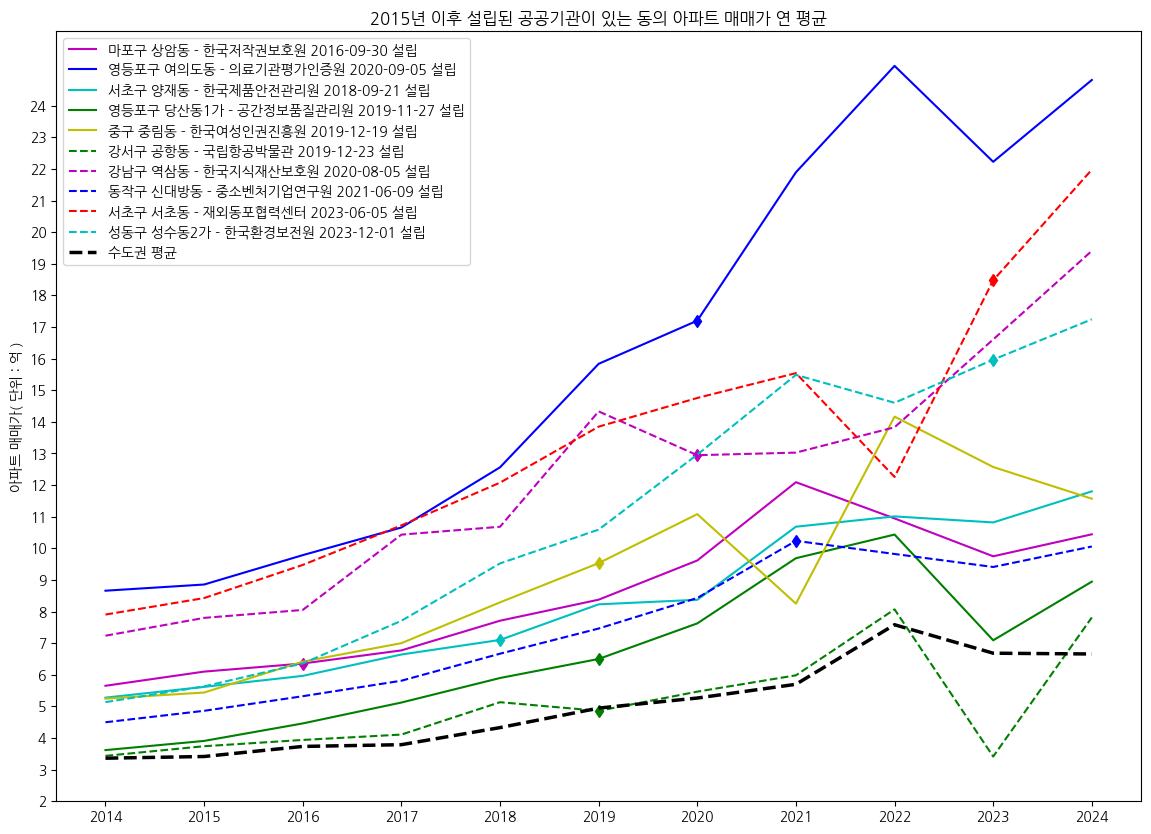

In [358]:
x_date = capital_year["YEAR"]

plt.figure(figsize=(14,10))

# plt.plot(dong_year[dong_year["DONG"] == "필동1가"]["YEAR"], dong_year[dong_year["DONG"] == "필동1가"]["AVG_PRICE"])

for i in range(1, len(public_dong_list)):
    draw_plot_public(public_dong_list[i], color_list[i], marker_list[i])

plt.plot(x_date,capital_year["PRICE"], "k--", label = "수도권 평균", lw=2.5)

plt.title("2015년 이후 설립된 공공기관이 있는 동의 아파트 매매가 연 평균")

eoook = 25
plt.xticks(range(2014, 2025))
plt.yticks(range(200000000, 100000000 * eoook, 100000000), labels=range(2, eoook))
plt.ylabel("아파트 매매가( 단위 : 억 )")
plt.legend(loc=2)

plt.show()

# 신설 / 아닌곳

In [26]:
def new(data):
    if data["DONG"] in new_metro_dong_list:
        est = "metro"
    else:
        est = "old"
    return est

In [17]:
dong_year

,YEAR,GU,DONG,AVG_PRICE
0,2014,강남구,개포동,675095010
1,2015,강남구,개포동,740169933
2,2016,강남구,개포동,881572605
3,2017,강남구,개포동,1080648173
4,2018,강남구,개포동,1422776349
...,...,...,...,...
3441,2020,중랑구,중화동,500824468
3442,2021,중랑구,중화동,634930357
3443,2022,중랑구,중화동,427260869
3444,2023,중랑구,중화동,519795454


In [27]:
dong_year["METRO"] = dong_year.apply(new, axis =1)

In [28]:
dong_year

,YEAR,GU,DONG,AVG_PRICE,METRO
0,2014,강남구,개포동,675095010,old
1,2015,강남구,개포동,740169933,old
2,2016,강남구,개포동,881572605,old
3,2017,강남구,개포동,1080648173,old
4,2018,강남구,개포동,1422776349,old
...,...,...,...,...,...
3441,2020,중랑구,중화동,500824468,metro
3442,2021,중랑구,중화동,634930357,metro
3443,2022,중랑구,중화동,427260869,metro
3444,2023,중랑구,중화동,519795454,metro


In [33]:
df = pd.pivot_table(data= dong_year, index= ["YEAR"], columns="METRO", values="AVG_PRICE", aggfunc="mean")
df

METRO,metro,old
YEAR,,
2014,4.929298e+08,4.516686e+08
2015,5.087364e+08,4.784714e+08
2016,5.654469e+08,5.352342e+08
2017,6.445946e+08,5.922547e+08
2018,7.390518e+08,6.777158e+08
2019,8.158801e+08,7.573905e+08
2020,9.978964e+08,8.754310e+08
2021,1.125898e+09,1.040798e+09
2022,1.063209e+09,1.000781e+09


In [38]:
df.style.format(thousands=',')

METRO,metro,old
YEAR,,
2014,"492,929,849.363636","451,668,602.186047"
2015,"508,736,408.818182","478,471,391.430000"
2016,"565,446,910.272727","535,234,174.567213"
2017,"644,594,575.636364","592,254,666.167763"
2018,"739,051,768.727273","677,715,788.032895"
2019,"815,880,072.600000","757,390,476.045307"
2020,"997,896,390.916667","875,430,987.070513"
2021,"1,125,898,138.454545","1,040,797,817.950658"
2022,"1,063,208,847.454545","1,000,780,847.503472"


In [41]:
fmt = lambda x: '{:.2f}억'.format(x/(10**8))
df.style.format(formatter={'metro':fmt, 'old':fmt})

METRO,metro,old
YEAR,,
2014,4.93억,4.52억
2015,5.09억,4.78억
2016,5.65억,5.35억
2017,6.45억,5.92억
2018,7.39억,6.78억
2019,8.16억,7.57억
2020,9.98억,8.75억
2021,11.26억,10.41억
2022,10.63억,10.01억


In [42]:
df['diffNew'] = df['metro'].rolling(window=2).apply(lambda x: ((x.iloc[1]-x.iloc[0])/x.iloc[0]))

In [44]:
df['diffOld'] = df['old'].rolling(window=2).apply(lambda x: ((x.iloc[1]-x.iloc[0])/x.iloc[0]))

In [50]:
df = df.fillna(0)

In [53]:
seoul_metro["EST_DATE"].unique()

array(['2010-02-18', '2010-12-29', '2011-11-30', '2012-10-06',
       '2012-12-15', '2013-12-28', '2016-04-30', '2016-09-26',
       '2018-09-29', '2018-12-01', '2022-06-07'], dtype=object)

In [51]:
fmt = lambda x: '{:.2f}억'.format(x/(10**8))
fmt_per = lambda x: '{:.2f}%'.format(x * 100)
df.style.format(formatter={'metro':fmt, 'old':fmt, 'diffNew':fmt_per, 'diffOld':fmt_per})

METRO,metro,old,diffNew,diffOld
YEAR,,,,
2014,4.93억,4.52억,0.00%,0.00%
2015,5.09억,4.78억,3.21%,5.93%
2016,5.65억,5.35억,11.15%,11.86%
2017,6.45억,5.92억,14.00%,10.65%
2018,7.39억,6.78억,14.65%,14.43%
2019,8.16억,7.57억,10.40%,11.76%
2020,9.98억,8.75억,22.31%,15.59%
2021,11.26억,10.41억,12.83%,18.89%
2022,10.63억,10.01억,-5.57%,-3.84%


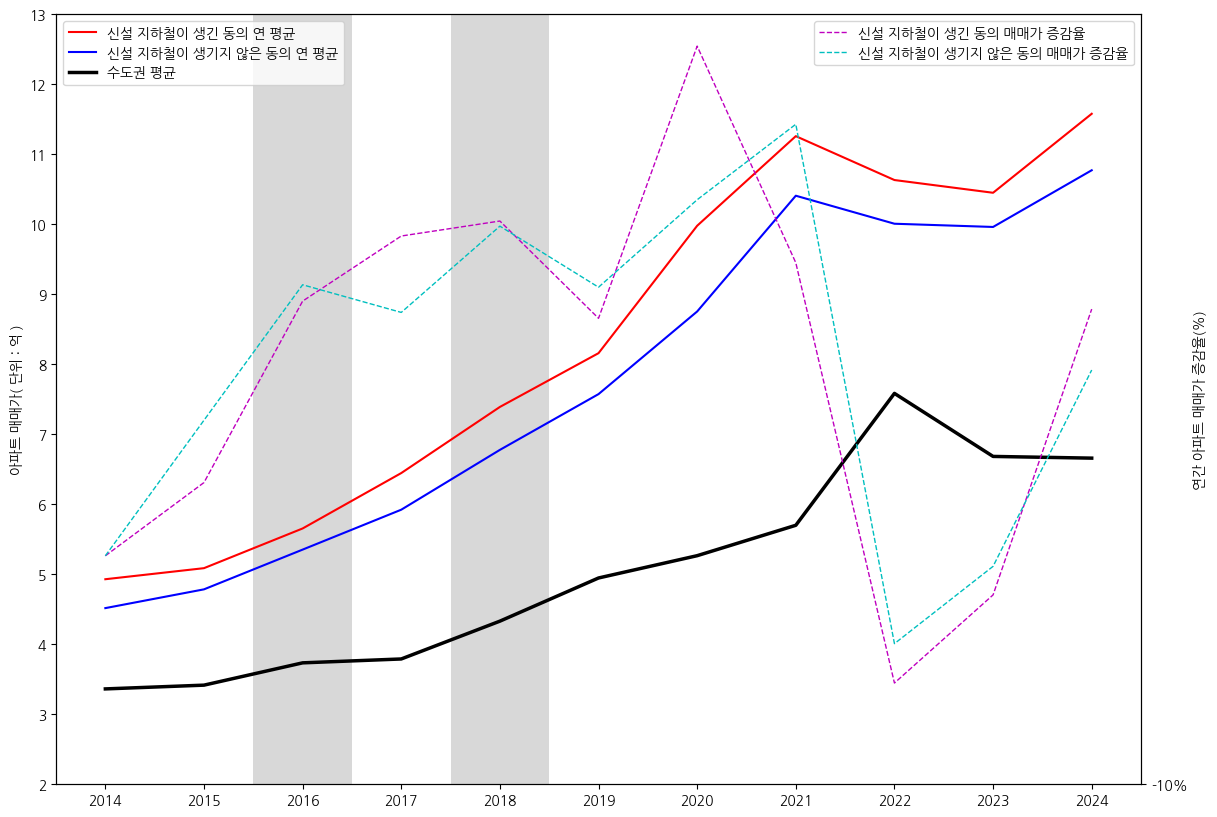

In [102]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot()

ax1.plot(df.index, df["metro"], "r-", label = "신설 지하철이 생긴 동의 연 평균", lw=1.5)
ax1.plot(df.index, df["old"], "b-", label = "신설 지하철이 생기지 않은 동의 연 평균", lw=1.5)
ax1.plot(capital_year["YEAR"], capital_year["PRICE"], "k", label = "수도권 평균", lw=2.5)

ax1.set_ylabel("아파트 매매가( 단위 : 억 )")
eoook = 14
ax1.set_yticks(range(200000000, 100000000 * eoook, 100000000))
ax1.set_yticklabels(range(2, eoook))

ax1.set_xticks(df.index)

ax1.tick_params(axis="y")
ax1.legend(loc=2)

ax1.axvspan(2015.5, 2016.5, facecolor='gray', alpha=0.3)
ax1.axvspan(2017.5, 2018.5, facecolor='gray', alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(df.index, df["diffNew"], "m--", label = "신설 지하철이 생긴 동의 매매가 증감율", lw=1)
ax2.plot(df.index, df["diffOld"], "c--", label = "신설 지하철이 생기지 않은 동의 매매가 증감율", lw=1)

ax2.set_ylabel("연간 아파트 매매가 증감율(%)")

y_tick = np.arange(-0.1, 0.3, 10)
ax2.set_yticks(y_tick)
ax2.set_yticklabels([f'{x * 100:.0f}%' for x in y_tick])
ax2.tick_params(axis="y")
ax2.legend(loc=1)

plt.show()

In [25]:
remote.close()

# 9호선 신설

In [105]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import re

options = webdriver.ChromeOptions()

In [106]:
url = "https://www.juso.go.kr/support/AddressMainSearch.do?"
driver = webdriver.Chrome(service=Service("../../eda/driver/chromedriver"), options=options)
driver.get(url)

In [104]:
sql = """
SELECT * from METRO_ADDRESS WHERE LINE_NAME like '%9%'
"""

cursor.execute(sql)
result = cursor.fetchall()

line_9 = pd.DataFrame(result)
line_9.columns = [desc[0] for desc in cursor.description]
line_9.head()

,COMPANY,LINE_NAME,STATION_NAME,OLD_ADDRESS,ADDRESS,extra
0,서울9호선,9호선,개화,서울특별시 강서구 개화동 493-2,서울특별시 강서구 개화동로 8길 38,None
1,서울9호선,9호선,김포공항,서울특별시 강서구 방화동 886,서울특별시 강서구 하늘길 77,None
2,서울9호선,9호선,공항시장,서울특별시 강서구 공항동 산 20-2,서울특별시 강서구 방화동로 30,None
3,서울9호선,9호선,신방화,서울특별시 강서구 방화동 217-156,서울특별시 강서구 방화대로 301,None
4,서울9호선,9호선,마곡나루,서울특별시 강서구 마곡동 367-6,서울특별시 강서구 마곡중앙5로 2,None


In [107]:
address_list = []

for i, row in line_9.iterrows():
    address_list.append(row["ADDRESS"])

print(address_list)    

['서울특별시 강서구 개화동로 8길 38', '서울특별시 강서구 하늘길 77', '서울특별시 강서구 방화동로 30', '서울특별시 강서구 방화대로 301', '서울특별시 강서구 마곡중앙5로 2', '서울특별시 강서구 양천로 341', '서울특별시 강서구 양천로 485', '서울특별시 강서구 양천로 560', '서울특별시 강서구 공항대로 529', '서울특별시 강서구 공항대로 631', '서울특별시 양천구 목동중앙로 217', '서울특별시 영등포구 양평로 124', '서울특별시 영등포구 양평로 40', '서울특별시 영등포구 국회대로 758', '서울특별시 영등포구 의사당대로 101', '서울특별시 영등포구 의사당대로 166', '서울특별시 동작구 노량진로 130', '서울특별시 동작구 노량진로 238', '서울특별시 동작구 현충로 90', '서울특별시 동작구 현충로 220', '서울특별시 서초구 신반포로 17', '서울특별시 서초구 신반포로 105', '서울특별시 서초구 신반포로 188', '서울특별시 서초구 사평대로 285', '서울특별시 강남구 봉은사로 102', '서울특별시 강남구 봉은사로 201', '서울특별시 강남구 선릉로 580', '서울특별시 강남구 봉은사로 501', '서울특별시 강남구 봉은사로 601', '서울특별시 송파구 올림픽로 23', '서울특별시 송파구 백제고분로 지하 187', '서울특별시 송파구 삼학사로 지하 53 ', '서울특별시 송파구 송파대로 지하 439', '서울특별시 송파구 백제고분로 지하 446', '서울특별시 송파구 위례성대로 지하 51', '서울특별시 송파구 양재대로 지하 1233', '서울특별시 강동구 강동대로 지하 327', '서울특별시 강동구 명일로 지하 117']


In [108]:
def get_address(address):
    try:
        # 검색창 클릭
        search_box = driver.find_element(By.CLASS_NAME, "box_search")
        search_box.click()
        time.sleep(1)

        # 검색어 입력
        search = search_box.find_element(By.ID, "keyword")
        search.clear()
        search.send_keys(address)
        time.sleep(1)

        # 검색버튼 클릭
        driver.implicitly_wait(5)
        search_click = driver.find_element(By.ID, "searchButton")
        search_click.click()
        time.sleep(1)

        # 첫번째 결과 세부정보 클릭
        try:
            result = driver.find_elements(By.CLASS_NAME, "addAddr")
#            print(address, len(result))
            result[0].click()
        except:
            result = driver.find_element(By.CLASS_NAME, "addAddr")
            print(address, "0")
            result.click()

        # 관할 주민센터 주소 가져오기 
        address = driver.find_elements(By.CLASS_NAME, "info_center")
        dong = address[0].find_element(By.TAG_NAME, "span")

        address = dong.text
        new_address = address

    except:
        new_address = address
        address = ""

    return new_address, address

In [109]:
dong_list_9 = []

for i, row in line_9.iterrows():
    new_address, address = get_address(row["OLD_ADDRESS"])

    if len(address) > 0:
        dong = address.split(" ")[2]
    else:
        dong = ""

    dong_list_9.append(dong)

In [110]:
driver.quit()
remote.close()

In [113]:
line_9["DONG"] = dong_list_9

In [123]:
line_9.reset_index(inplace=True)

In [124]:
line_9

,index,COMPANY,LINE_NAME,STATION_NAME,OLD_ADDRESS,ADDRESS,extra,DONG
0,0,서울9호선,9호선,개화,서울특별시 강서구 개화동 493-2,서울특별시 강서구 개화동로 8길 38,None,방화제2동
1,1,서울9호선,9호선,김포공항,서울특별시 강서구 방화동 886,서울특별시 강서구 하늘길 77,None,방화제2동
2,2,서울9호선,9호선,공항시장,서울특별시 강서구 공항동 산 20-2,서울특별시 강서구 방화동로 30,None,공항동
3,3,서울9호선,9호선,신방화,서울특별시 강서구 방화동 217-156,서울특별시 강서구 방화대로 301,None,방화제1동
4,4,서울9호선,9호선,마곡나루,서울특별시 강서구 마곡동 367-6,서울특별시 강서구 마곡중앙5로 2,None,가양제1동
5,5,서울9호선,9호선,양천향교,서울특별시 강서구 가양동 159-3,서울특별시 강서구 양천로 341,None,가양제1동
6,6,서울9호선,9호선,가양,서울특별시 강서구 가양동 14-61,서울특별시 강서구 양천로 485,None,가양제2동
7,7,서울9호선,9호선,증미,서울특별시 강서구 등촌동 666-40,서울특별시 강서구 양천로 560,None,등촌제1동
8,8,서울9호선,9호선,등촌,서울특별시 강서구 등촌동 666-94,서울특별시 강서구 공항대로 529,None,등촌제1동
9,9,서울9호선,9호선,염창,서울특별시 강서구 염창동 284-84,서울특별시 강서구 공항대로 631,None,염창동


In [134]:
dong_list_99 = []

for i, row in line_9.iterrows():
    dong = row["OLD_ADDRESS"].split(" ")[2]
    dong_list_99.append(dong)

In [136]:
line_9["DONNG"] = dong_list_99

In [137]:
line_9

,index,COMPANY,LINE_NAME,STATION_NAME,OLD_ADDRESS,ADDRESS,extra,DONG,DONNG
0,0,서울9호선,9호선,개화,서울특별시 강서구 개화동 493-2,서울특별시 강서구 개화동로 8길 38,None,방화제2동,개화동
1,1,서울9호선,9호선,김포공항,서울특별시 강서구 방화동 886,서울특별시 강서구 하늘길 77,None,방화제2동,방화동
2,2,서울9호선,9호선,공항시장,서울특별시 강서구 공항동 산 20-2,서울특별시 강서구 방화동로 30,None,공항동,공항동
3,3,서울9호선,9호선,신방화,서울특별시 강서구 방화동 217-156,서울특별시 강서구 방화대로 301,None,방화제1동,방화동
4,4,서울9호선,9호선,마곡나루,서울특별시 강서구 마곡동 367-6,서울특별시 강서구 마곡중앙5로 2,None,가양제1동,마곡동
5,5,서울9호선,9호선,양천향교,서울특별시 강서구 가양동 159-3,서울특별시 강서구 양천로 341,None,가양제1동,가양동
6,6,서울9호선,9호선,가양,서울특별시 강서구 가양동 14-61,서울특별시 강서구 양천로 485,None,가양제2동,가양동
7,7,서울9호선,9호선,증미,서울특별시 강서구 등촌동 666-40,서울특별시 강서구 양천로 560,None,등촌제1동,등촌동
8,8,서울9호선,9호선,등촌,서울특별시 강서구 등촌동 666-94,서울특별시 강서구 공항대로 529,None,등촌제1동,등촌동
9,9,서울9호선,9호선,염창,서울특별시 강서구 염창동 284-84,서울특별시 강서구 공항대로 631,None,염창동,염창동


In [140]:
line_9["DONNG"][31] = "삼전동"

/tmp/ipykernel_207302/1477869282.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  line_9["DONNG"][31] = "삼전동"
/tmp/ipykernel_207302/1477869282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [143]:
line_9_dong_list = line_9["DONNG"].unique()

In [145]:
dong_year.head()

,YEAR,GU,DONG,AVG_PRICE,METRO
0,2014,강남구,개포동,675095010,old
1,2015,강남구,개포동,740169933,old
2,2016,강남구,개포동,881572605,old
3,2017,강남구,개포동,1080648173,old
4,2018,강남구,개포동,1422776349,old
